In [95]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
annual = pd.read_csv('annual_gold_rate.csv')
daily = pd.read_csv('daily_gold_rate.csv')

In [4]:
annual.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1978,193.44,124.73580,100.65449,NaN,NaN,NaN
1,1979,304.68,185.06142,143.09014,2481.90512,1163.93597,NaN
2,1980,614.50,378.19461,263.80259,4831.74943,2278.36795,NaN
3,1981,459.26,360.90588,227.01948,3966.64790,1691.03194,NaN
4,1982,375.30,345.59742,215.53232,3553.62680,1378.72895,NaN


In [5]:
daily.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [6]:
annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    44 non-null     int64  
 1   USD     44 non-null     float64
 2   EUR     44 non-null     float64
 3   GBP     44 non-null     float64
 4   INR     43 non-null     float64
 5   AED     43 non-null     float64
 6   CNY     37 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


In [7]:
daily.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [11]:
annual = annual.fillna(0)
daily = daily.fillna(0)

In [16]:
annual.describe()

,Date,USD,EUR,GBP,INR,AED,CNY
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1999.500000,692.055909,571.891313,450.575615,33253.117656,2527.018449,4163.333618
std,12.845233,486.226172,395.398741,357.907845,37391.513640,1805.300331,3592.354190
min,1978.000000,193.440000,124.735800,100.654490,0.000000,0.000000,0.000000
25%,1988.750000,360.540000,302.387860,215.853185,6121.383235,1324.054458,1651.230198
50%,1999.500000,416.415000,359.622620,249.850690,12660.300050,1530.159455,2876.835330
75%,2010.250000,1176.175000,932.098448,761.273783,60353.236650,4320.047947,7414.661810
max,2021.000000,1798.610000,1549.044710,1378.980990,132967.875100,6606.550460,12205.481970


In [17]:
daily.describe()

,USD,EUR,GBP,INR,AED,CNY
count,9714.000000,9714.000000,9714.000000,9714.000000,9714.000000,9714.000000
mean,756.117006,625.441514,500.862103,39552.116958,2777.031055,4993.277354
std,510.826310,415.971087,375.932133,38595.686908,1876.433314,3386.025009
min,252.800000,222.200000,157.150000,3687.170000,928.530000,0.000000
25%,354.000000,305.272500,219.602500,11601.020000,1298.662500,2189.317500
50%,425.750000,362.995000,259.565000,17068.540000,1563.645000,3312.385000
75%,1235.987500,1017.935000,824.057500,76038.925000,4539.797500,8100.617500
max,2067.150000,1874.560000,1572.810000,156815.690000,7592.950000,14355.530000


In [79]:
annualpct = annual.set_index('Date').fillna(0)
annualpct.head()

,USD,EUR,GBP,INR,AED,CNY
Date,,,,,,
1978,193.44,124.73580,100.65449,0.00000,0.00000,0.0
1979,304.68,185.06142,143.09014,2481.90512,1163.93597,0.0
1980,614.50,378.19461,263.80259,4831.74943,2278.36795,0.0
1981,459.26,360.90588,227.01948,3966.64790,1691.03194,0.0
1982,375.30,345.59742,215.53232,3553.62680,1378.72895,0.0


In [80]:
annualpct = annualpct.pct_change()
annualpct.head()

,USD,EUR,GBP,INR,AED,CNY
Date,,,,,,
1978,NaN,NaN,NaN,NaN,NaN,NaN
1979,0.575062,0.483627,0.421597,inf,inf,NaN
1980,1.016870,1.043617,0.843611,0.946791,0.957468,NaN
1981,-0.252628,-0.045714,-0.139434,-0.179045,-0.257788,NaN
1982,-0.182816,-0.042417,-0.050600,-0.104123,-0.184682,NaN


In [87]:
annualpct = annualpct.reset_index()

In [140]:
dailypct = daily.set_index('Date').fillna(0)

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,0.0
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,0.0
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,0.0
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,0.0
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [141]:
dailypct = dailypct.pct_change()
dailypct.head()

,USD,EUR,GBP,INR,AED,CNY
Date,,,,,,
1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-02,-0.009082,-0.002385,-0.000038,-0.010142,0.000000,NaN
1985-01-03,-0.010475,-0.010984,-0.012180,-0.018001,-0.023580,NaN
1985-01-04,0.002812,0.000176,-0.000685,0.010960,0.009515,NaN
1985-01-07,-0.016164,-0.011583,-0.005370,-0.004897,-0.023815,inf


In [142]:
dailypct = dailypct.reset_index()

#############################################################################

#############################################################################

#############################################################################

In [41]:
fig = go.Figure([go.Scatter(x=annual['Date'], y=annual['USD'])])
fig.show()

In [34]:
fig = go.Figure([go.Scatter(x=annual['Date'], y=annual['EUR'])])
fig.show()

In [36]:
fig = go.Figure([go.Scatter(x=annual['Date'], y=annual['GBP'])])
fig.show()

In [37]:
fig = go.Figure([go.Scatter(x=annual['Date'], y=annual['INR'])])
fig.show()

In [38]:
fig = go.Figure([go.Scatter(x=annual['Date'], y=annual['AED'])])
fig.show()

In [39]:
fig = go.Figure([go.Scatter(x=annual['Date'], y=annual['CNY'])])
fig.show()

#############################################################################

#############################################################################

#############################################################################

In [88]:
annualpct.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1978,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,0.575062,0.483627,0.421597,inf,inf,NaN
2,1980,1.016870,1.043617,0.843611,0.946791,0.957468,NaN
3,1981,-0.252628,-0.045714,-0.139434,-0.179045,-0.257788,NaN
4,1982,-0.182816,-0.042417,-0.050600,-0.104123,-0.184682,NaN


In [89]:
fig = go.Figure([go.Scatter(x=annualpct['Date'], y=annualpct['USD'])])
fig.show()

In [90]:
fig = go.Figure([go.Scatter(x=annualpct['Date'], y=annualpct['EUR'])])
fig.show()

In [91]:
fig = go.Figure([go.Scatter(x=annualpct['Date'], y=annualpct['GBP'])])
fig.show()

In [92]:
fig = go.Figure([go.Scatter(x=annualpct['Date'], y=annualpct['INR'])])
fig.show()

In [93]:
fig = go.Figure([go.Scatter(x=annualpct['Date'], y=annualpct['AED'])])
fig.show()

In [94]:
fig = go.Figure([go.Scatter(x=annualpct['Date'], y=annualpct['CNY'])])
fig.show()

In [139]:
#plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Set1')

#num=0 
#for column in annual.drop('Date', axis=1):
#    num+=1

#    plt.subplot(15,90,num)
    
#    plt.plot(annual['Date'], annual[column], marker='', color=palette(num), linewidth=1.0, \
#           alpha=0.9, label=column)
    
#    plt.xlim(1975,2021)
#    plt.ylim(0,2000)
    
#    if num in range(7):
#        plt.tick_params(labelbottom='off')
#    if num not in [1,4,7]:
#        plt.tick_params(labelleft='off')
        
#    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

#plt.suptitle("Gold rate changes throughou the years", \
#                 fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
#plt.text(0.5, 0.02, 'Time', ha='center', va='center')
#plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

#plt.show()

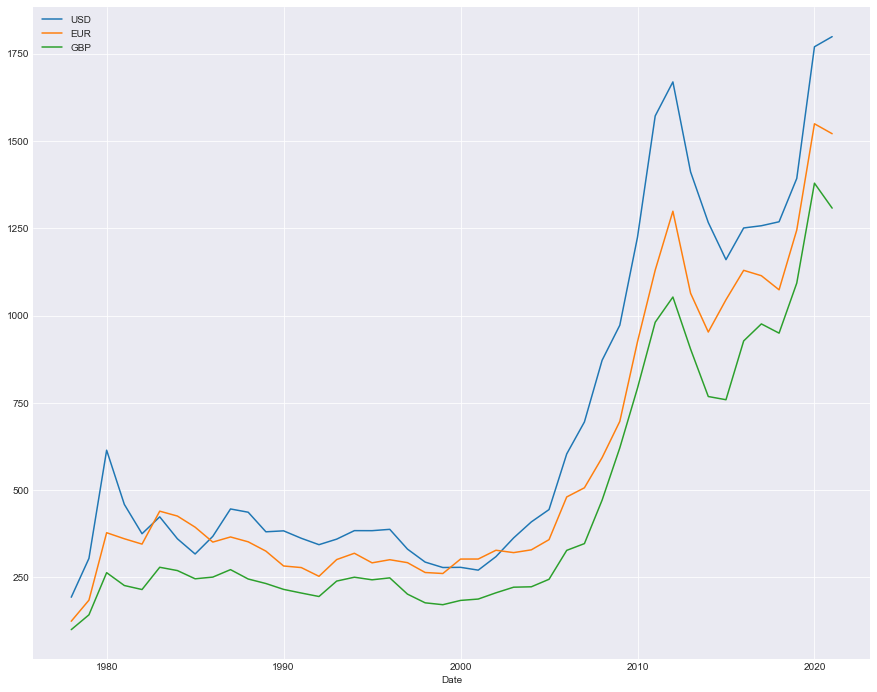

In [135]:
annual.plot(x="Date", y=['USD', 'EUR', 'GBP'], figsize=(15,12), grid=True)
plt.show()

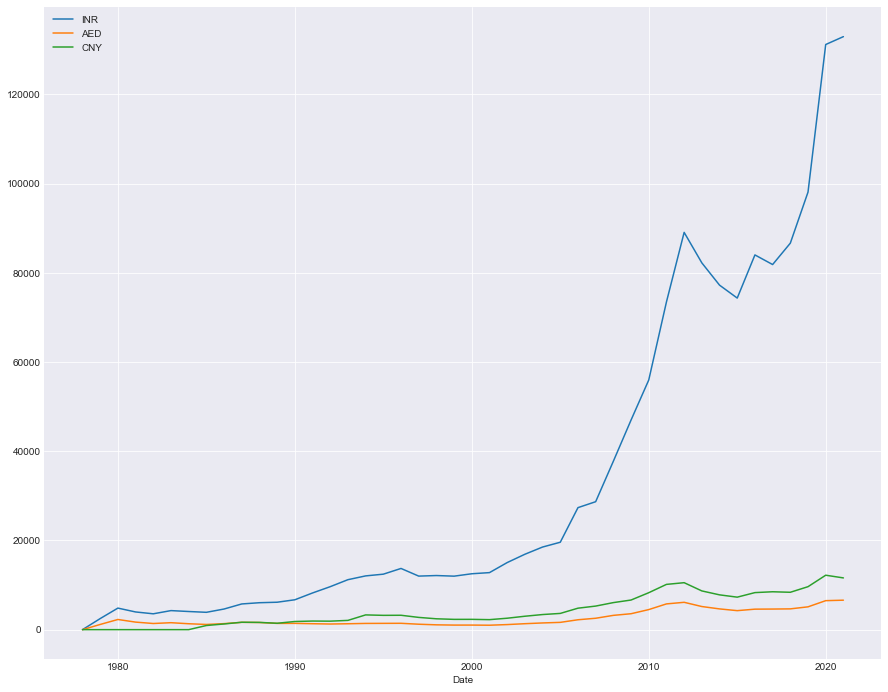

In [136]:
annual.plot(x="Date", y=['INR', 'AED', 'CNY'], figsize=(15,12), grid=True)
plt.show()

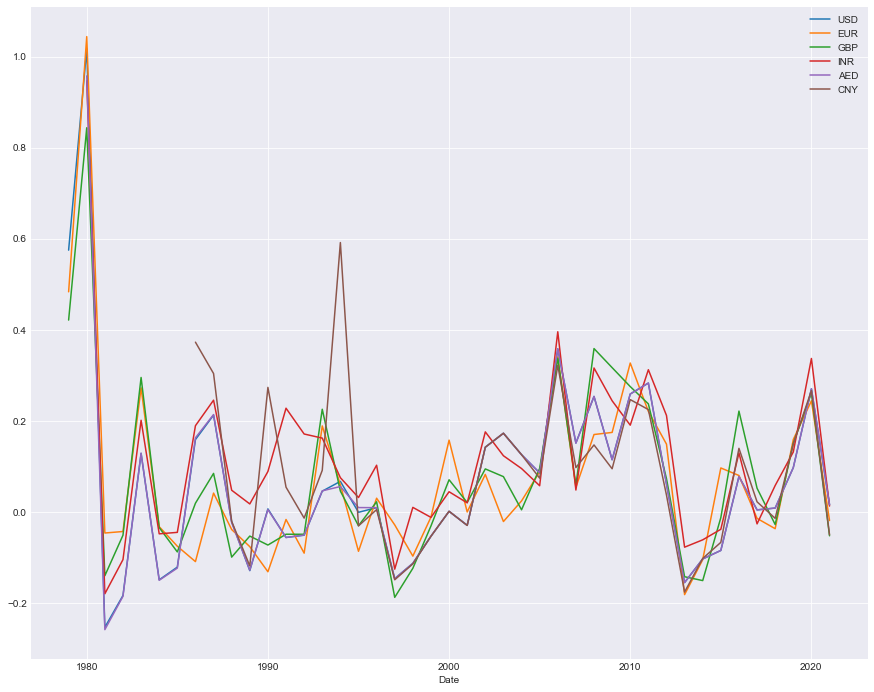

In [138]:
annualpct.plot(x="Date", y=['USD', 'EUR', 'GBP','INR', 'AED', 'CNY'], figsize=(15,12), grid=True)
plt.show()

In [145]:
fig = go.Figure([go.Scatter(x=dailypct['Date'], y=dailypct['USD'])])
fig.show()